# Shark Attack !!!

## visualizando...

vamos a visualizar los datos

In [1]:
import plotly.express as px
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go

In [2]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("DATA/clean_sharks.csv",encoding = "ISO-8859-1")

In [4]:
df.drop(['Unnamed: 0','Case Number', 'Date', 'Type', 'Location', 'Injury'], axis=1, inplace=True)

In [5]:
df.head(3)

,Year,Country,Area,Activity,Sex,Age,Fatal (Y/N),Time,Species,month,Hemisf,valor_verano,clean_specie
0,2018.0,USA,California,Paddling,F,57,N,18h00,White shark,Jun,norte,6,white shark
1,2018.0,USA,Georgia,Standing,F,11,N,14h00 -15h00,NaN,Jun,norte,6,unknown
2,2018.0,USA,Hawaii,Surfing,M,48,N,07h45,NaN,Jun,norte,6,unknown


# 1ª hipótesis: "los ataques son más frecuentes en verano"

#### agrupamos los datos del df por el "valor_verano"

In [6]:
agrup=pd.DataFrame(df.valor_verano.value_counts())

In [7]:
agrup=agrup.reset_index()

In [8]:
agrup.rename(columns={"index":"verano","valor_verano":"casos"}, inplace=True)

In [9]:
agrup.drop([0], axis=0,inplace=True)

In [10]:
agrup=agrup.sort_values('verano')

In [11]:
agrup=agrup.reset_index()

In [12]:
agrup.drop(["index"], axis=1, inplace=True)

In [13]:
agrup

,verano,casos
0,1,334
1,2,365
2,3,589
3,4,808
4,5,900
5,6,1250


#### y lo representamos en esta gráfica:

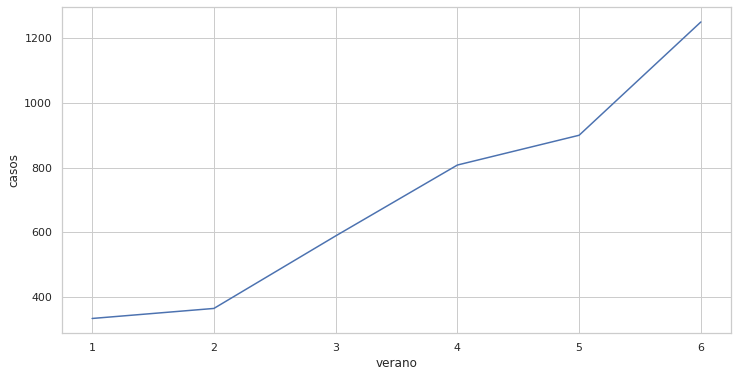

In [14]:
sns.lineplot(data=agrup, x="verano", y="casos");

### vemos que prácticamente se ajusta a una regresión lineal, por lo que la hipótesis es cierta.

# 2ª hipótesis: "los ataques se distribuyen por océanos"

#### vamos a utilizar el dataframe "mar" que obtuvimos en nuestra limpieza:

In [15]:
mar = pd.read_csv("DATA/cases_by_sea.csv",encoding = "ISO-8859-1")

In [16]:
mar.rename(columns={"Unnamed: 0":"Area"}, inplace=True)

In [17]:
mar.head()

,Area,cases,Accumu,Sea,Hemisphere
0,Florida,1037,16.449873,car,norte
1,New South Wales,486,24.159264,pas,sur
2,Queensland,311,29.092640,pas,sur
3,Hawaii,298,33.819797,pan,norte
4,California,290,38.420051,pan,norte


In [18]:
mar.Sea.value_counts()

-      775
pas     15
car     10
atn      7
pan      6
ind      6
ats      3
med      3
Name: Sea, dtype: int64

In [19]:
mar.drop(mar[mar.Sea=="-"].index, inplace=True)

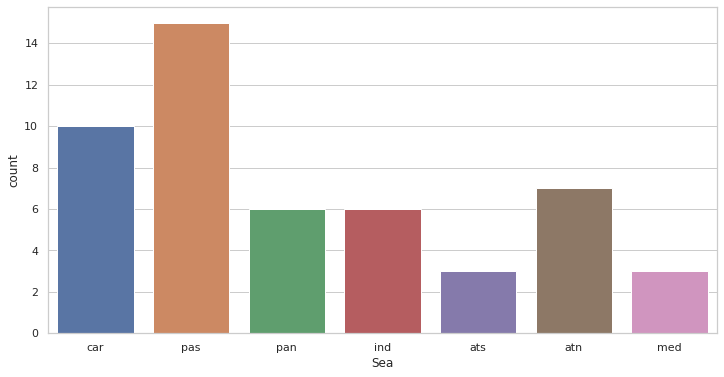

In [20]:
sns.countplot(x=mar.Sea);

### el Pacífico Sur y el Caribe son los mares donde más ataques se dan.

# 3ª hipótesis: "el tiburón blanco es el más peligroso"

#### tenemos muchas especies con un único caso observado, que nos distorsiona mucho

In [21]:
gru=pd.DataFrame(df.clean_specie.value_counts())
gru=gru.reset_index()
gru.rename(columns={"index":"especie","clean_specie":"casos"}, inplace=True)
gru.drop([0], axis=0,inplace=True)
gru

,especie,casos
1,white shark,634
2,tiger shark,260
3,bull shark,177
4,m shark,129
5,nurse shark,97
...,...,...
98,gray shark,1
99,for shark,1
100,8 shark,1
101,red shark,1


In [22]:
gru.drop(gru[gru.casos<=20].index, inplace=True)

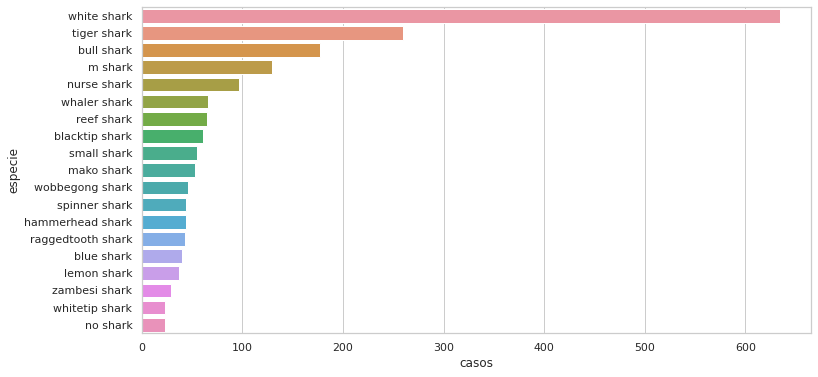

In [23]:
sns.barplot(data=gru,x="casos",y="especie");

### efectivamente, el tiburón blanco es con diferencia el tiburón más mortífero y mortal